In [1]:
import SimpleITK as sitk
import numpy as np
import os, sys, glob
from tqdm.auto import tqdm
import cv2
from skimage.transform import resize
from natsort import natsorted
import matplotlib.pyplot as plt
from openslide import OpenSlide

In [2]:
img_list = natsorted(glob.glob('../Data/img/*.tiff'))
mask_list = natsorted(glob.glob('../Data/label/*.tiff'))

print(len(img_list))
print(len(mask_list))

500
500


(12288, 3584, 4) 0 255 uint8
(12288, 3584, 4) 0 255 uint8


(array([0, 1, 2, 4], dtype=uint8), array([25189868, 13172912,    62452,  5614960]))


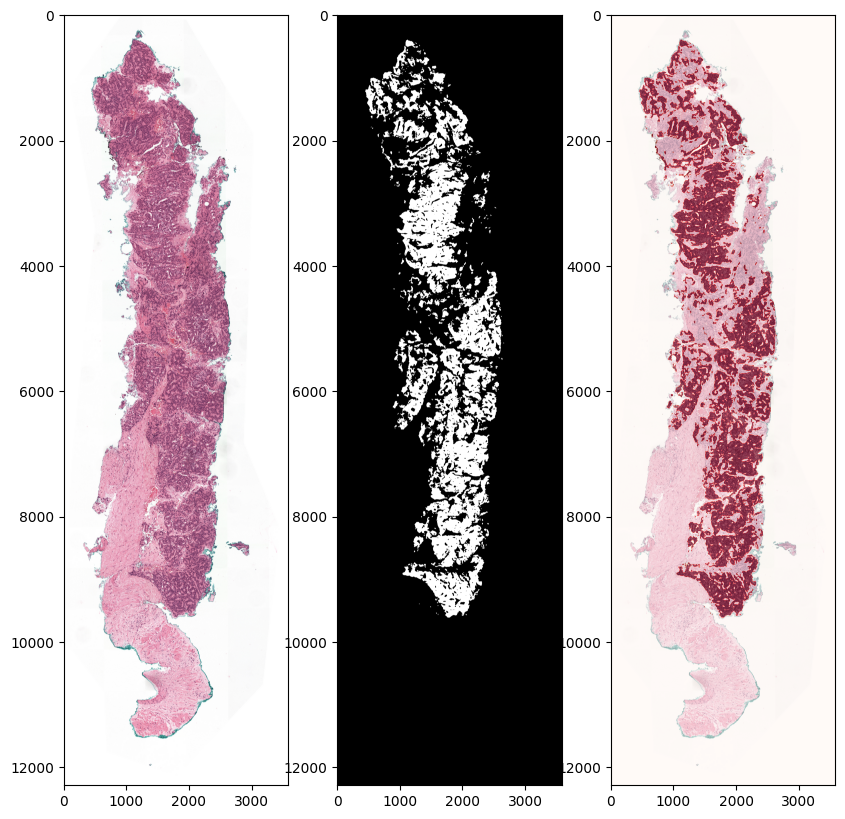

In [3]:
for idx in range(len(img_list)):
    
    sam_img = sitk.ReadImage(img_list[idx])
    sam_mask = sitk.ReadImage(mask_list[idx])
    
    sam_img = sitk.GetArrayFromImage(sam_img)
    sam_mask = sitk.GetArrayFromImage(sam_mask)
    
    print(sam_img.shape, sam_img.min(), sam_img.max(), sam_img.dtype)
    print(sam_mask.shape, sam_mask.min(), sam_mask.max(), sam_mask.dtype)
    print('\n')
    uniq = np.unique(sam_mask[...,0], return_counts=True)
    print(uniq)

    sam_mask[sam_mask<3] = 0
    sam_mask[sam_mask>2] = 1
    
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(sam_img)
    plt.subplot(132)
    plt.imshow(sam_mask[...,0], cmap='gray')
    plt.subplot(133)
    plt.imshow(sam_img)
    plt.imshow(sam_mask[...,0], cmap='Reds', alpha=.5)
    plt.show()

    break

In [4]:
img_slide = OpenSlide(img_list[0])
mask_slide = OpenSlide(mask_list[0])

print("Slide dimensions:", img_slide.dimensions)
print("Slide level count:", img_slide.level_count)
print("Slide level dimensions:", img_slide.level_dimensions)
print("Slide level downsamples:", img_slide.level_downsamples)

Slide dimensions: (3584, 12288)
Slide level count: 3
Slide level dimensions: ((3584, 12288), (896, 3072), (224, 768))
Slide level downsamples: (1.0, 4.0, 16.0)


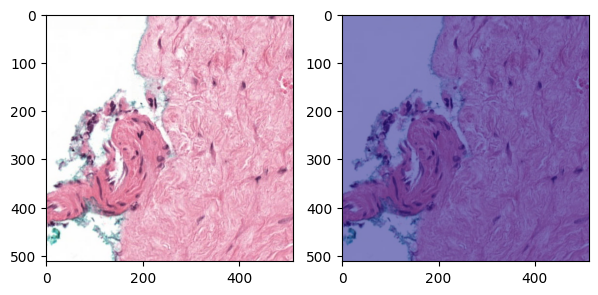

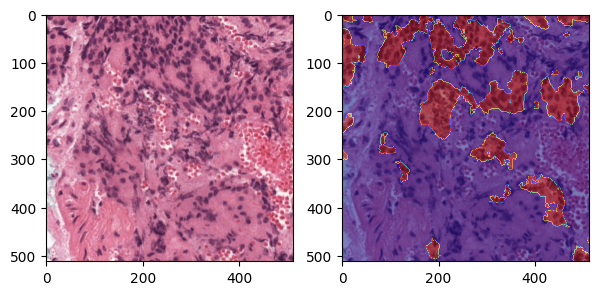

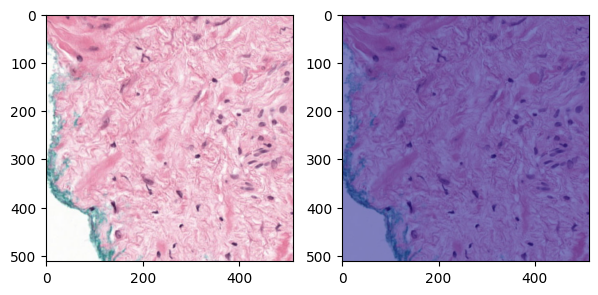

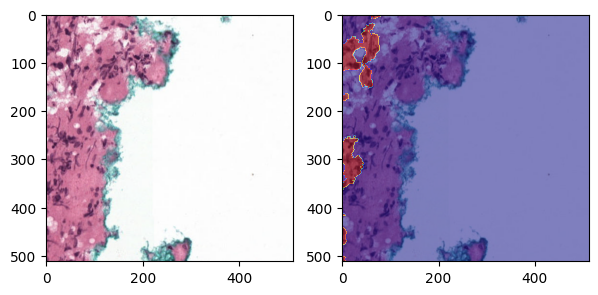

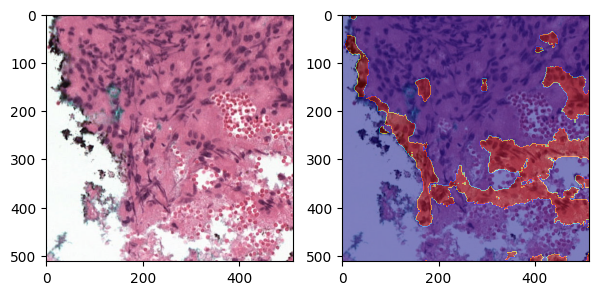

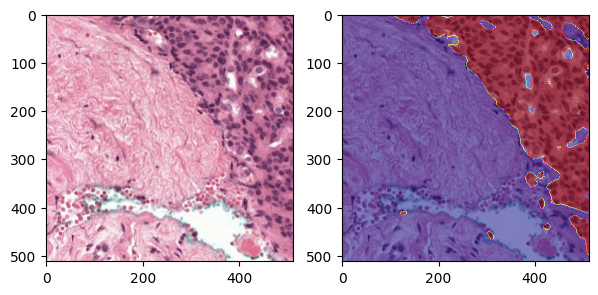

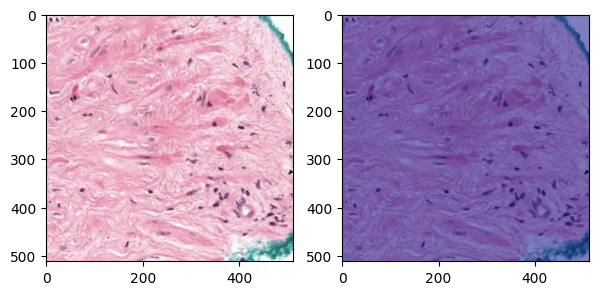

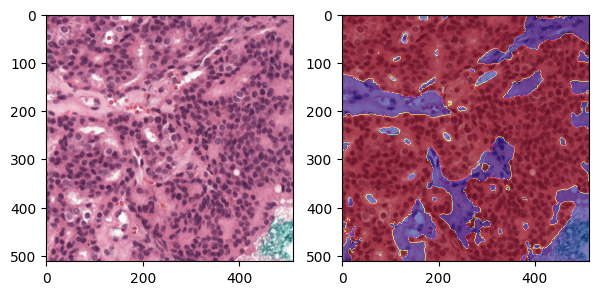

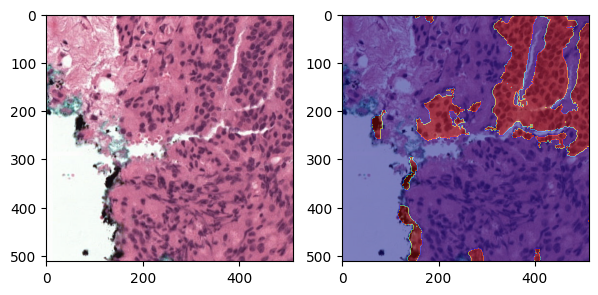

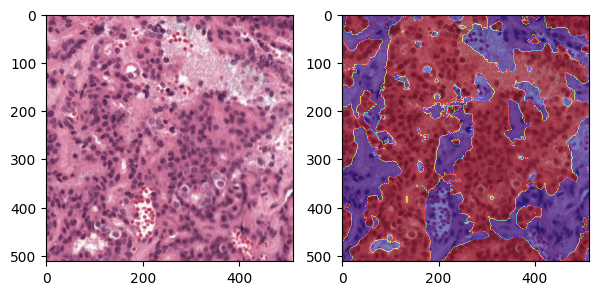

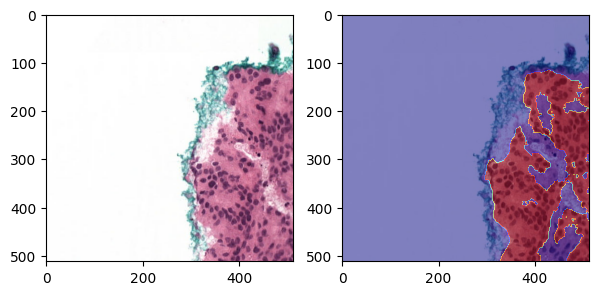

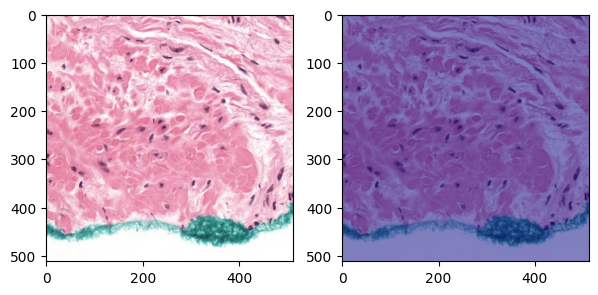

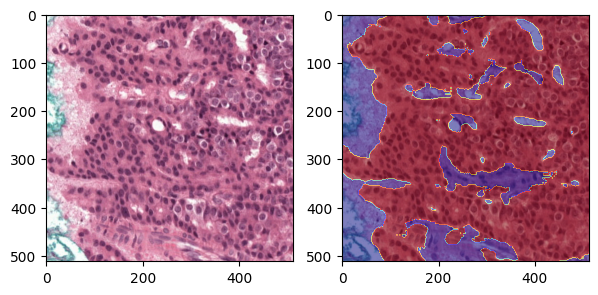

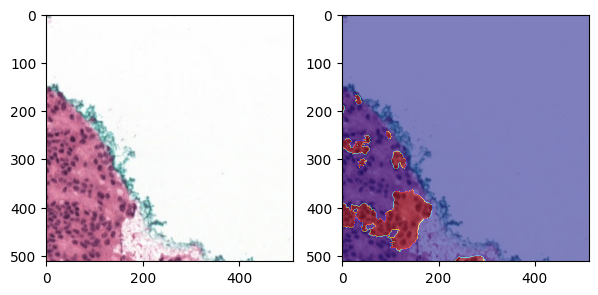

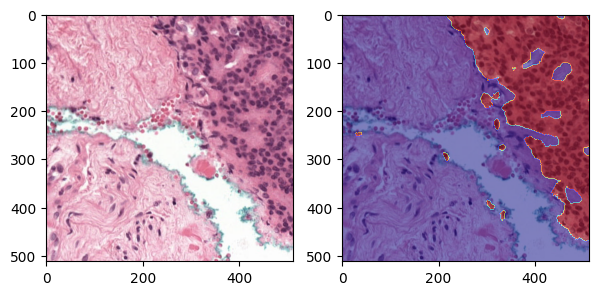

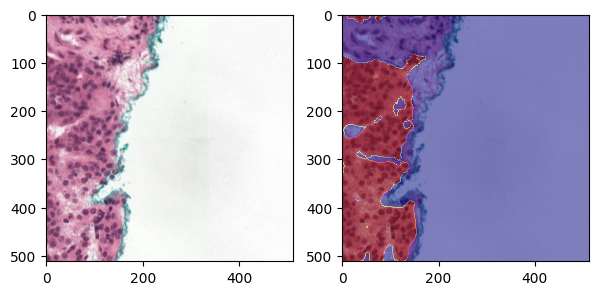

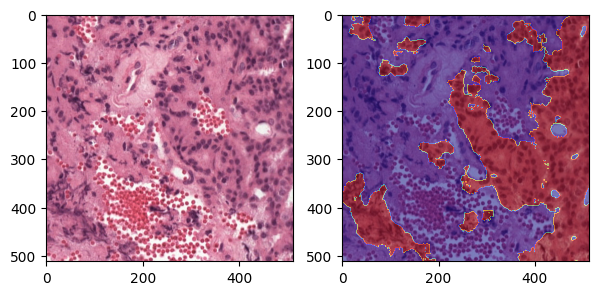

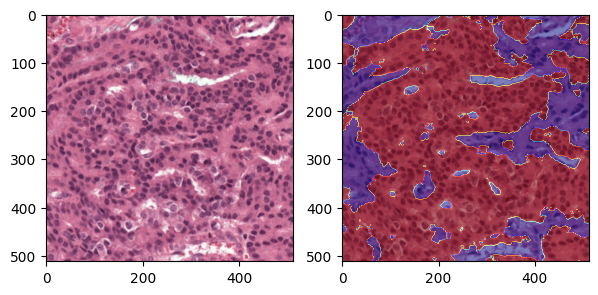

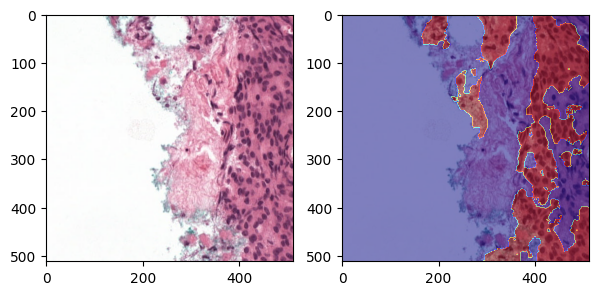

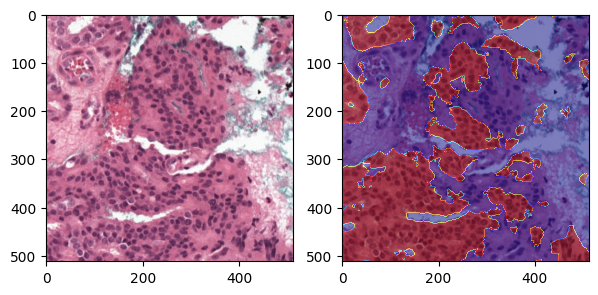

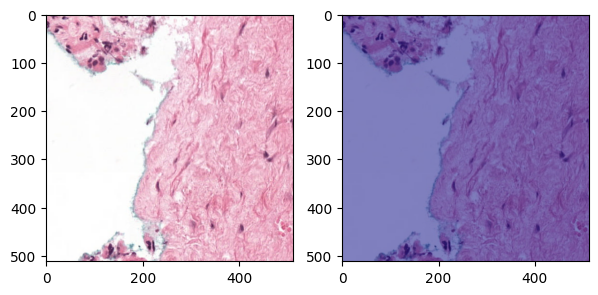

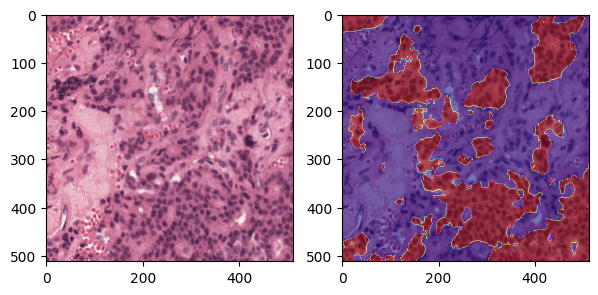

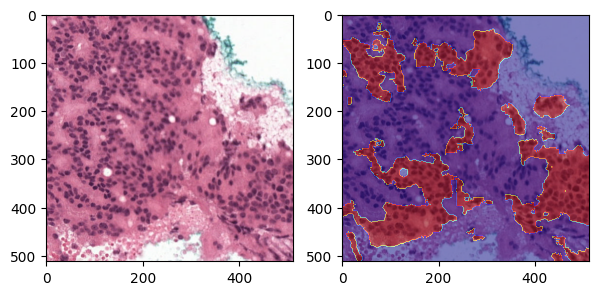

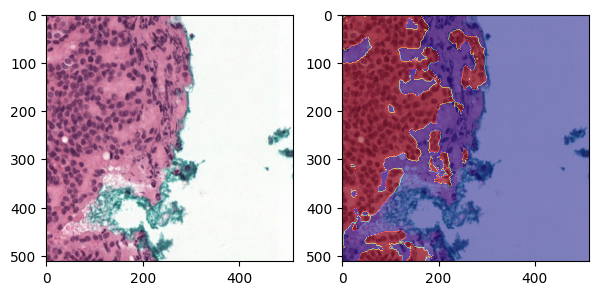

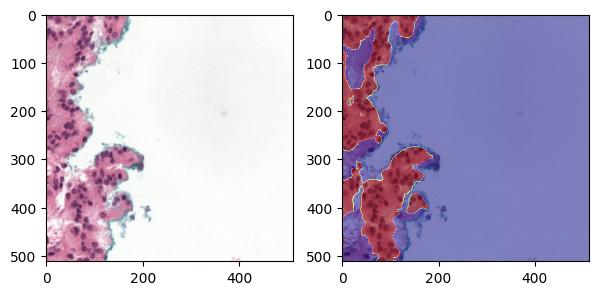

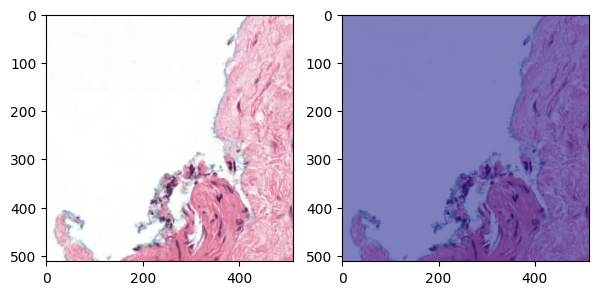

In [8]:
size = 512
img = []
mask= []
for i in range(50):
    x, y = np.random.randint(0, img_slide.level_dimensions[0][0]-size), np.random.randint(0, img_slide.level_dimensions[0][1]-size)
    img_patch = img_slide.read_region((x,y), 0, (size, size))
    img_patch = img_patch.convert("RGB")
    img_patch = np.array(img_patch)
    
    if img_patch.mean() > 245:
        continue
        
    mask_patch = mask_slide.read_region((x,y), 0, (size, size))
    mask_patch = np.array(mask_patch)[...,0]
    mask_patch[mask_patch<3] = 0
    mask_patch[mask_patch>2] = 1
    
    plt.figure(figsize=(7,7))
    plt.subplot(121)
    plt.imshow(img_patch)
    plt.subplot(122)
    plt.imshow(img_patch)
    plt.imshow(mask_patch, cmap='jet', alpha=.5)
    plt.show()
    
    img.append(img_patch)
    mask.append(mask_patch)
img = np.array(img)
mask = np.array(mask)

In [7]:
print(img.shape, img.min(), img.max(), img.dtype)
print(mask.shape, mask.min(), mask.max(), mask.dtype)

(32, 512, 512, 3) 0 255 uint8
(32, 512, 512) 0 1 uint8
